# Checking if a pair of stocks is cointegrated

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(16, 9))

# simulate stock return

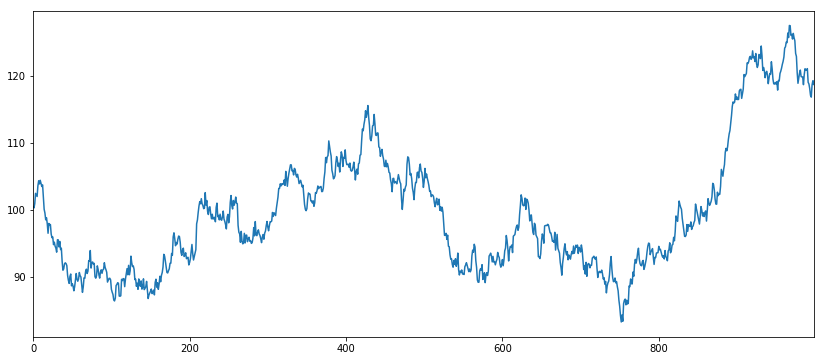

In [2]:
np.random.seed(42)

# generate returns
drift = 100
r1 = np.random.normal(0, 1, 1000) 
s1 = pd.Series(np.cumsum(r1), name='s1') + drift
s1.plot(figsize=(14,6))
plt.show()

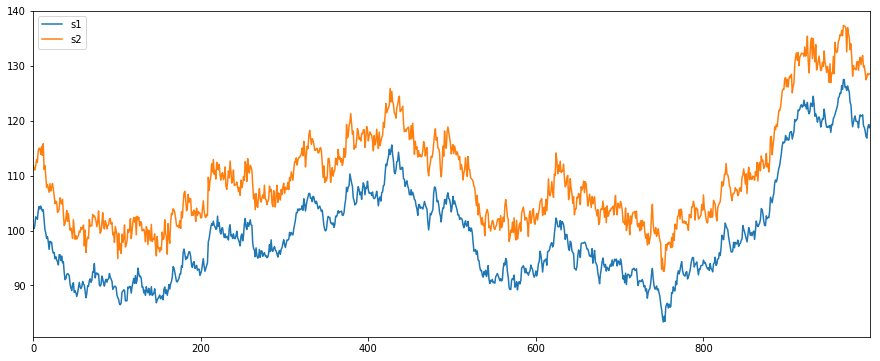

In [3]:
offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 's2'
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

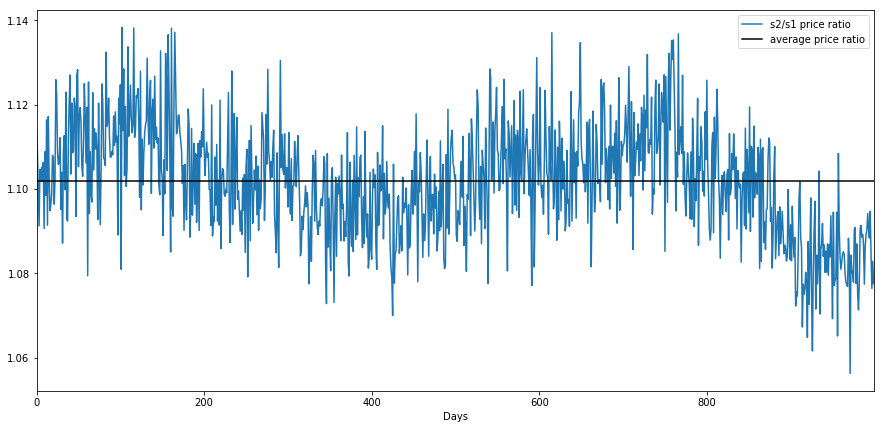

average price ratio 1.1019


In [4]:
price_ratio = s2/s1
price_ratio.plot(figsize=(15,7)) 
plt.axhline(price_ratio.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['s2/s1 price ratio', 'average price ratio'])
plt.show()
print(f"average price ratio {price_ratio.mean():.4f}")

## Calculate hedge ratio with regression

## Linear Regression

In [5]:
type(s1)

pandas.core.series.Series

In [6]:
type(s1.values)

numpy.ndarray

In [7]:
s1.values.reshape(-1,1).shape

(1000, 1)

In [8]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1),s2.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
hedge_ratio = lr.coef_[0][0]
hedge_ratio

1.0029961865956531

In [10]:
intercept = lr.intercept_[0]
intercept

9.772265203149601

In [11]:
print(f"hedge ratio from regression is {hedge_ratio:.4f}, intercept is {intercept:.4f}")

hedge ratio from regression is 1.0030, intercept is 9.7723


## Calculate the spread

In [12]:
spread = s2 - s1 * hedge_ratio

In [13]:
print(f"Average spread is {spread.mean()}")

Average spread is 9.772265203149585


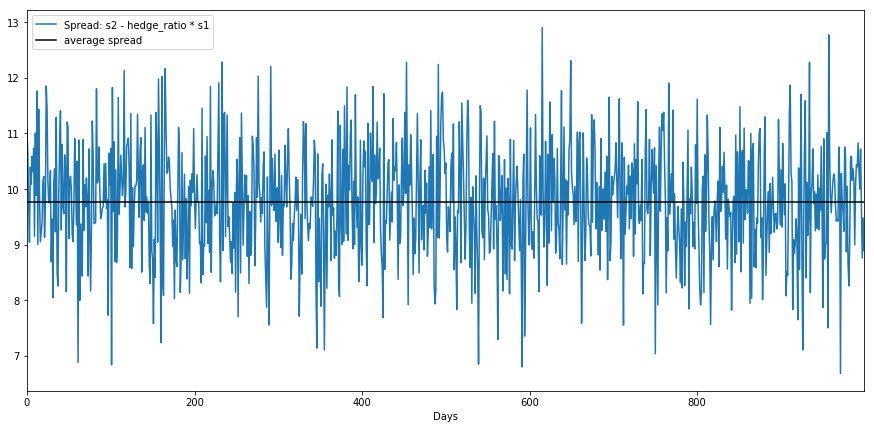

In [14]:
spread.plot(figsize=(15,7)) 
plt.axhline(spread.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - hedge_ratio * s1', 'average spread'])
plt.show()

In [15]:
spread_with_intercept = s2 - (s1 * hedge_ratio + intercept)
print(f"Average spread with intercept included is {spread_with_intercept.mean()}")

Average spread with intercept included is -1.5646151041437406e-14


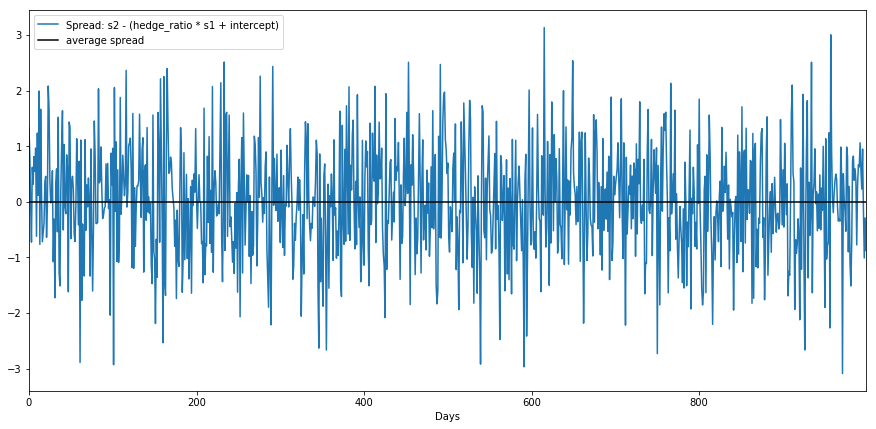

In [16]:
spread_with_intercept.plot(figsize=(15,7)) 
plt.axhline(spread_with_intercept.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - (hedge_ratio * s1 + intercept)', 'average spread'])
plt.show()

### Check if spread is stationary using Augmented Dickey Fuller Test

In [17]:
def is_spread_stationary(spread, p_level=0.05):

    adf_result = adfuller(spread)
    
    pvalue = adf_result[1] #pvalue
    
    print(f"pvalue {pvalue:.4f}")
    if pvalue <= p_level:
        print(f"pvalue is <= {p_level}, assume spread is stationary")
        return True
    else:
        print(f"pvalue is > {p_level}, assume spread is not stationary")
        return False

In [18]:
print(f"Are the two series candidates for pairs trading? {is_spread_stationary(spread)}")

pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary
Are the two series candidates for pairs trading? True
